CENTRAL LIMIT THEOREM DEMONSTRATION
Parameters: Sample size (n) = 30, Number of samples = 1000

Bernoulli(p=0.3):

Binomial(n=10,p=0.4):

Geometric(p=0.2):

NegBinomial(r=3,p=0.4):

Poisson(λ=4):

Chi-square(df=3):


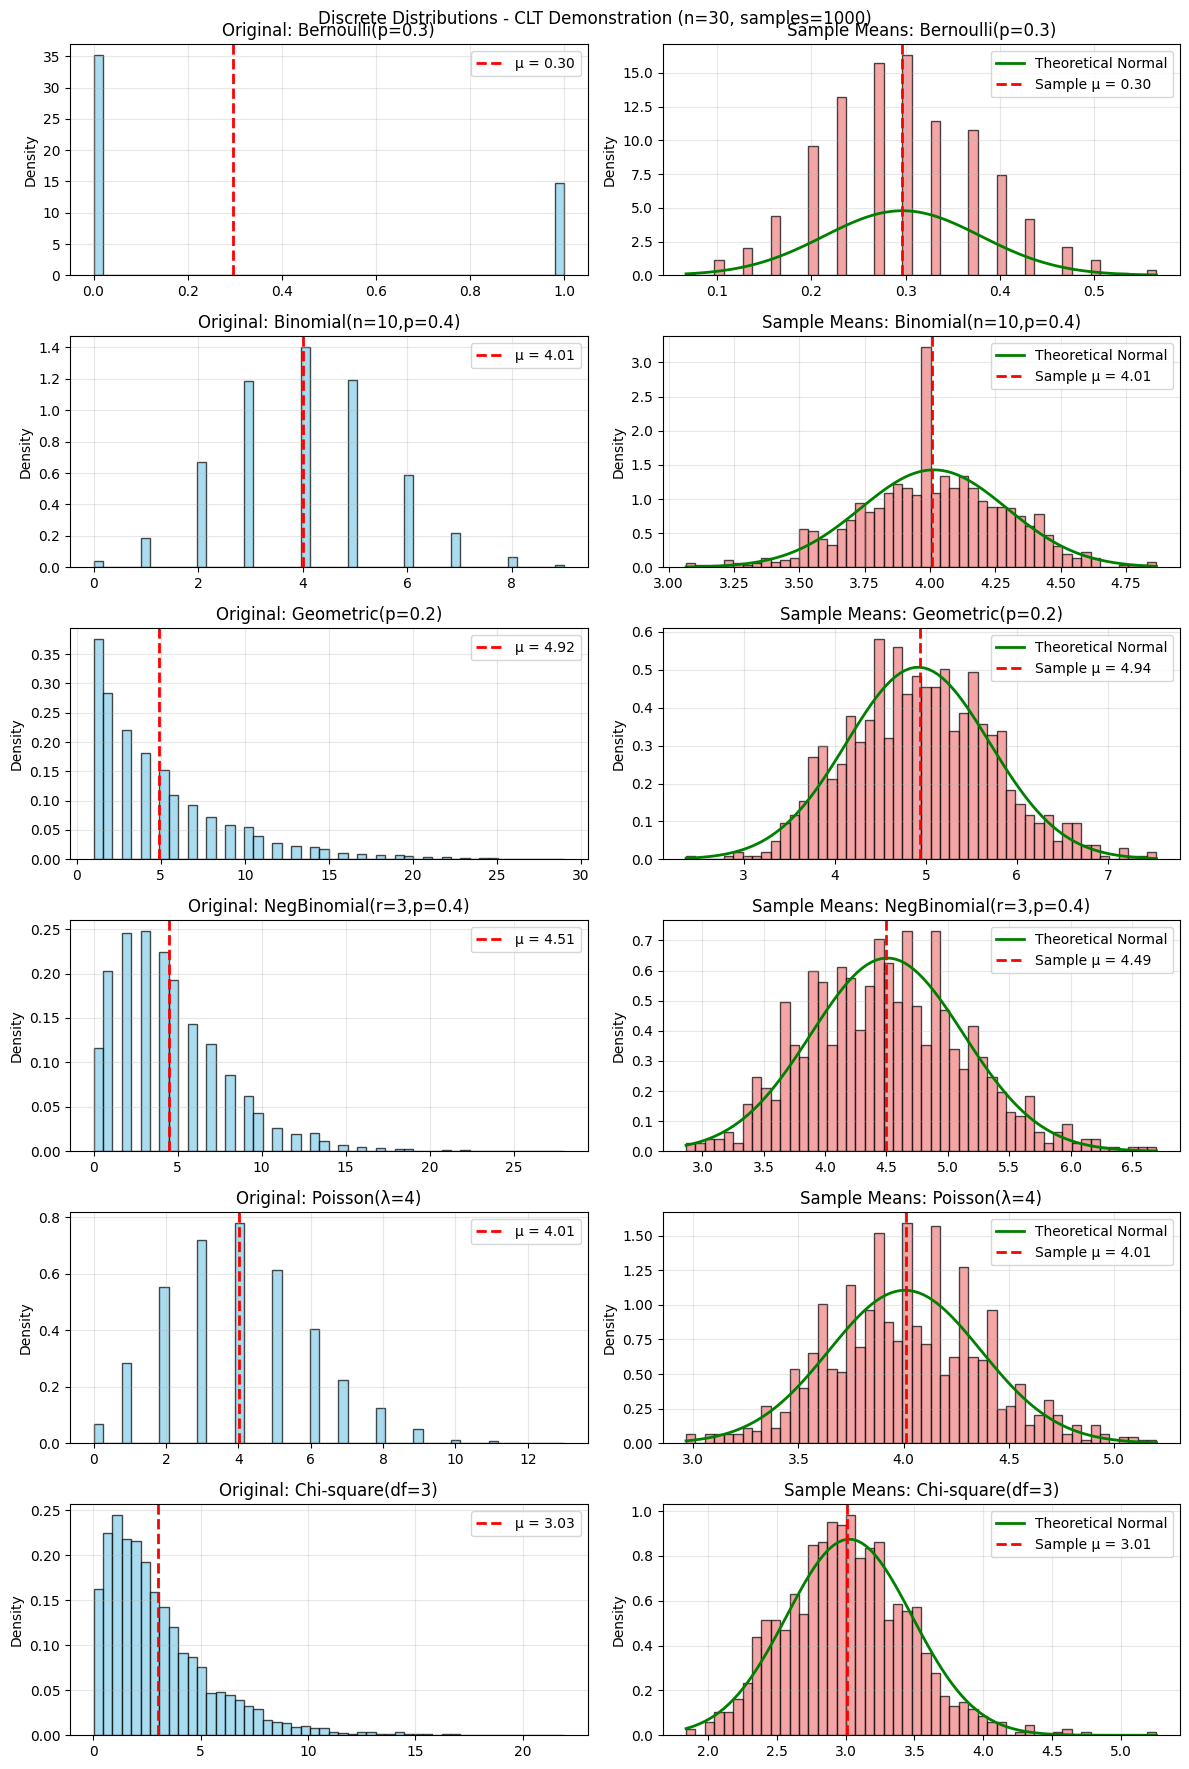


Uniform(a=2,b=5):

Exponential(λ=1):

Normal(μ=0,σ=1):

Beta(α=2,β=5):

Gamma(α=2,β=1):

t-dist(ν=3):


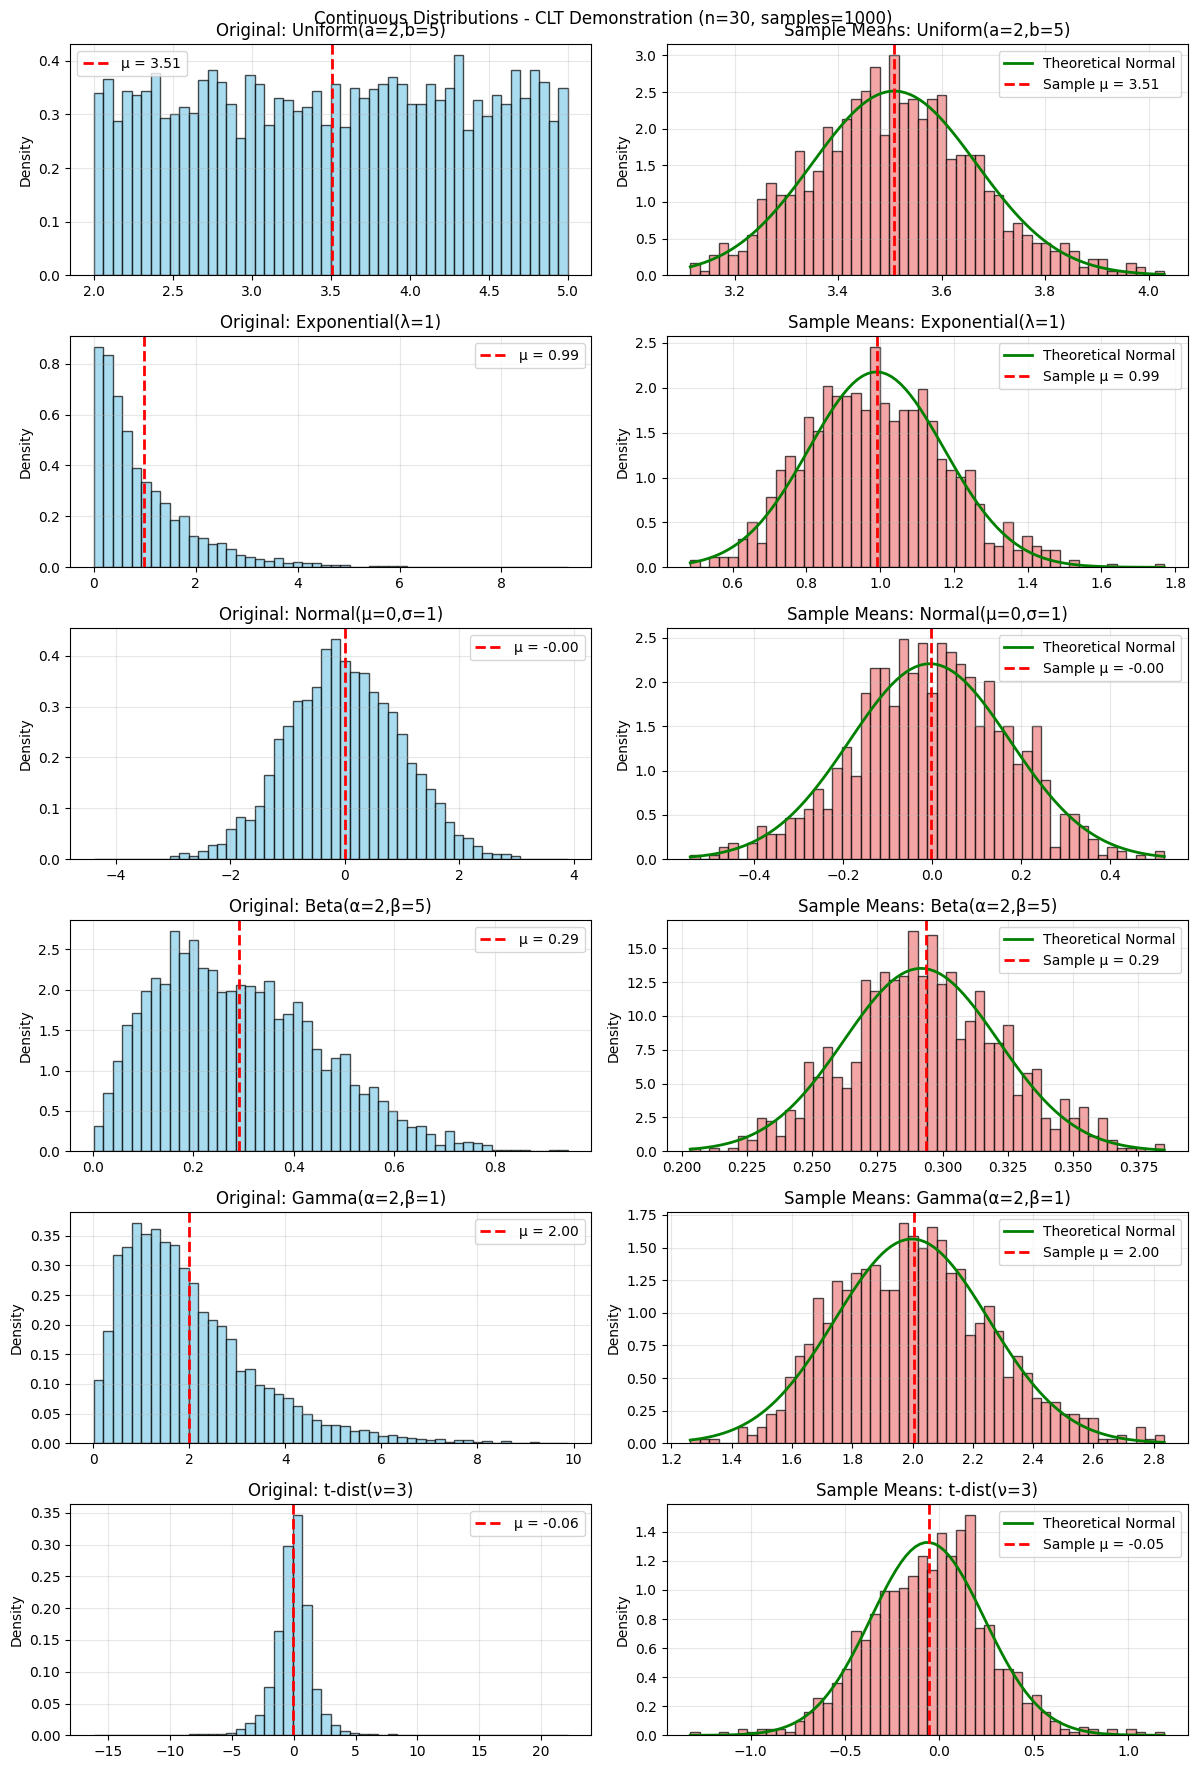


EXPERIMENT WITH DIFFERENT PARAMETERS:
Change SAMPLE_SIZE (try 5, 10, 30, 50)
Change NUM_SAMPLES (try 100, 500, 1000, 5000)
Notice how larger sample sizes make CLT work better!


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters to adjust
SAMPLE_SIZE = 30          # Size of each sample (n)
NUM_SAMPLES = 1000        # Number of samples to take
POPULATION_SIZE = 5000    # Size of original population

# Discrete Distributions
discrete_dists = [
    ("Bernoulli(p=0.3)", lambda: np.random.binomial(1, 0.3, POPULATION_SIZE)),
    ("Binomial(n=10,p=0.4)", lambda: np.random.binomial(10, 0.4, POPULATION_SIZE)),
    ("Geometric(p=0.2)", lambda: np.random.geometric(0.2, POPULATION_SIZE)),
    ("NegBinomial(r=3,p=0.4)", lambda: np.random.negative_binomial(3, 0.4, POPULATION_SIZE)),
    ("Poisson(λ=4)", lambda: np.random.poisson(4, POPULATION_SIZE)),
    ("Chi-square(df=3)", lambda: np.random.chisquare(3, POPULATION_SIZE))
]

# Continuous Distributions
continuous_dists = [
    ("Uniform(a=2,b=5)", lambda: np.random.uniform(2, 5, POPULATION_SIZE)),
    ("Exponential(λ=1)", lambda: np.random.exponential(1, POPULATION_SIZE)),
    ("Normal(μ=0,σ=1)", lambda: np.random.normal(0, 1, POPULATION_SIZE)),
    ("Beta(α=2,β=5)", lambda: np.random.beta(2, 5, POPULATION_SIZE)),
    ("Gamma(α=2,β=1)", lambda: np.random.gamma(2, 1, POPULATION_SIZE)),
    ("t-dist(ν=3)", lambda: np.random.standard_t(3, POPULATION_SIZE))
]

def demonstrate_clt(distributions, title):
    n_dists = len(distributions)
    fig, axes = plt.subplots(n_dists, 2, figsize=(12, 3*n_dists))
    fig.suptitle(f'{title} - CLT Demonstration (n={SAMPLE_SIZE}, samples={NUM_SAMPLES})', fontsize=12)
    
    for i, (name, dist_func) in enumerate(distributions):
        # Generate population
        population = dist_func()
        pop_mean = np.mean(population)
        pop_std = np.std(population)
        
        # Generate sample means
        sample_means = []
        for _ in range(NUM_SAMPLES):
            sample = np.random.choice(population, SAMPLE_SIZE, replace=True)
            sample_means.append(np.mean(sample))
        
        sample_means = np.array(sample_means)
        
        # Left plot: Original distribution
        axes[i, 0].hist(population, bins=50, density=True, alpha=0.7, color='skyblue', edgecolor='black')
        axes[i, 0].axvline(pop_mean, color='red', linestyle='--', linewidth=2, label=f'μ = {pop_mean:.2f}')
        axes[i, 0].set_title(f'Original: {name}')
        axes[i, 0].set_ylabel('Density')
        axes[i, 0].legend()
        axes[i, 0].grid(True, alpha=0.3)
        
        # Right plot: Sample means (CLT)
        axes[i, 1].hist(sample_means, bins=50, density=True, alpha=0.7, color='lightcoral', edgecolor='black')
        
        # Overlay theoretical normal distribution
        x = np.linspace(sample_means.min(), sample_means.max(), 100)
        theoretical_mean = pop_mean
        theoretical_std = pop_std / np.sqrt(SAMPLE_SIZE)
        theoretical_normal = (1/np.sqrt(2*np.pi*theoretical_std**2)) * np.exp(-0.5*((x-theoretical_mean)/theoretical_std)**2)
        
        axes[i, 1].plot(x, theoretical_normal, 'green', linewidth=2, label=f'Theoretical Normal')
        axes[i, 1].axvline(np.mean(sample_means), color='red', linestyle='--', linewidth=2, 
                          label=f'Sample μ = {np.mean(sample_means):.2f}')
        axes[i, 1].set_title(f'Sample Means: {name}')
        axes[i, 1].set_ylabel('Density')
        axes[i, 1].legend()
        axes[i, 1].grid(True, alpha=0.3)
        
        # Print statistics
        print(f"\n{name}:")
        
    plt.tight_layout()
    plt.show()

# Run demonstrations
print("="*60)
print("CENTRAL LIMIT THEOREM DEMONSTRATION")
print("="*60)
print(f"Parameters: Sample size (n) = {SAMPLE_SIZE}, Number of samples = {NUM_SAMPLES}")

demonstrate_clt(discrete_dists, "Discrete Distributions")
demonstrate_clt(continuous_dists, "Continuous Distributions")

print("\n" + "="*60)
print("EXPERIMENT WITH DIFFERENT PARAMETERS:")
print("Change SAMPLE_SIZE (try 5, 10, 30, 50)")
print("Change NUM_SAMPLES (try 100, 500, 1000, 5000)")
print("Notice how larger sample sizes make CLT work better!")
print("="*60)